# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [5]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [7]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

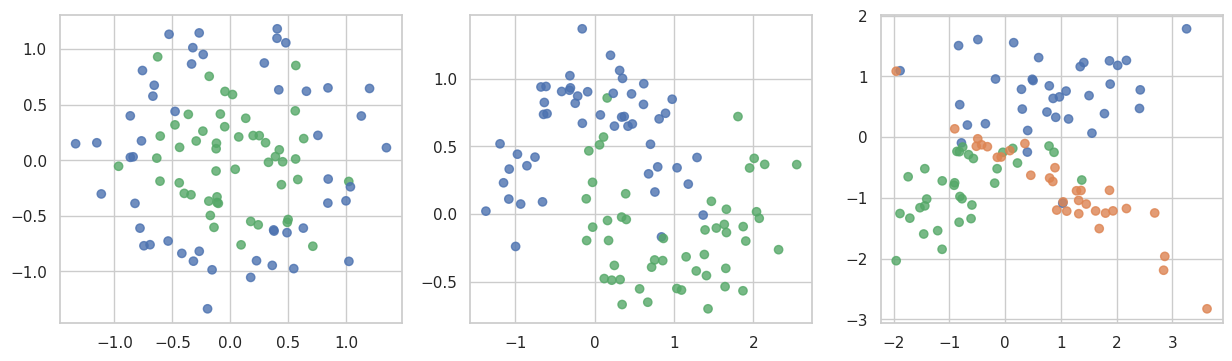

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

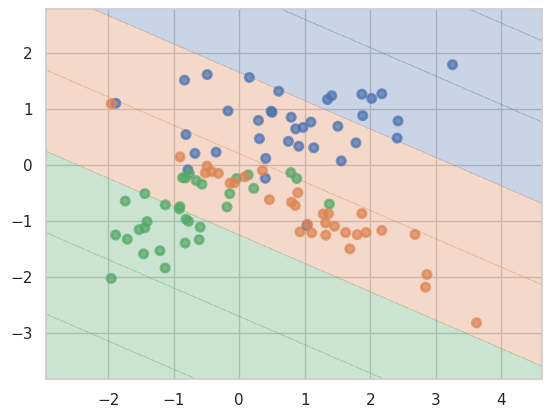

In [10]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

def train_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    plot_surface(clf, X_train, y_train)
    plt.title("Training Data")
    plt.show()
    
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"Точность на обучающей выборке: {train_accuracy}")
    print(f"Точность на тестовой выборке: {test_accuracy}")


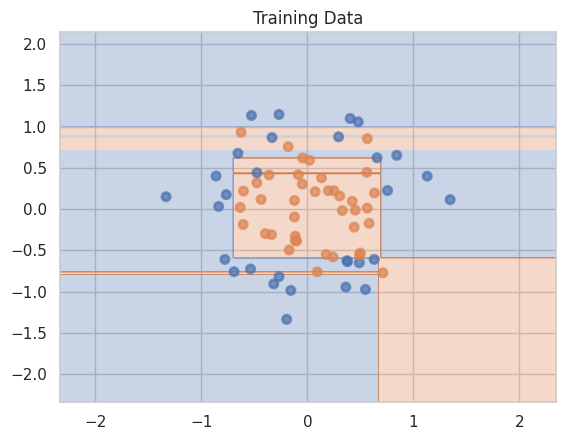

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.7333333333333333


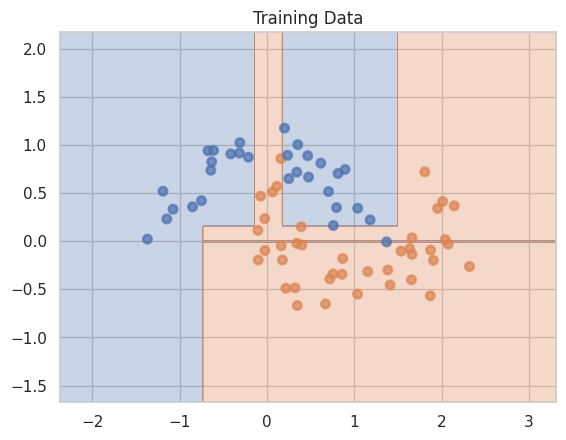

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.8666666666666667


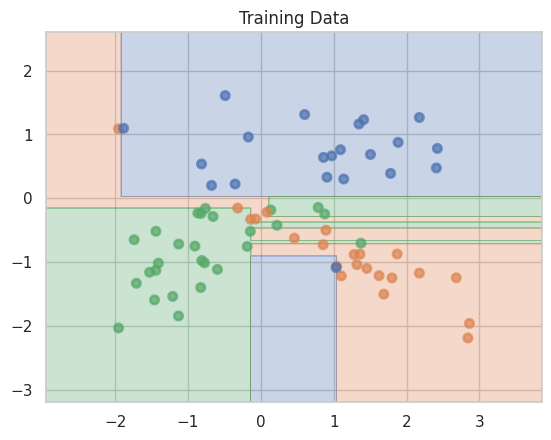

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.7666666666666667


In [19]:
for dataset in datasets:
    X, y = dataset
    train_tree(X, y)

__Ответ:__ Наше деревце обучилось с точностью 1.0 на обучающей выборке, что означает, что оно идеально подстроилось под каждую точку данных в обучающем наборе. Однако, на тестовой выборке точность снизилась до 0.73. Такой разрыв между точностью на обучающей и тестовой указывает на переобучении нашей модели.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [56]:
from sklearn.model_selection import GridSearchCV

def train_tree(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf, i):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

    clf.fit(X_train, y_train)

    plt.subplot(5, 5, i)
    plot_surface(clf, X_train, y_train)
    plt.title("Training Data")

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    plt.text(0.5, -0.2, f'Max depth: {max_depth} Min samples leaf: {min_samples_leaf}\nTrain Accuracy: {train_accuracy:.2f} Test Accuracy: {test_accuracy:.2f}',
             size=10, ha='center', transform=plt.gca().transAxes)
    
    return test_accuracy, train_accuracy


def get_best_param(dataset):

    max_test_accuracy = 0
    b_max_depth = None
    b_min_samples_leaf = None

    X, y = dataset

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    max_depth_values =  np.arange(1, 6)
    min_samples_leaf_values = np.arange(1, 6)
    
    plt.figure(figsize=(25, 25))
    ind = 0
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            ind += 1
            test_acc, train_acc = train_tree(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf, ind)
            if test_acc > max_test_accuracy:
                b_max_depth = max_depth
                b_min_samples_leaf = min_samples_leaf
    plt.show()
    return b_max_depth, b_min_samples_leaf

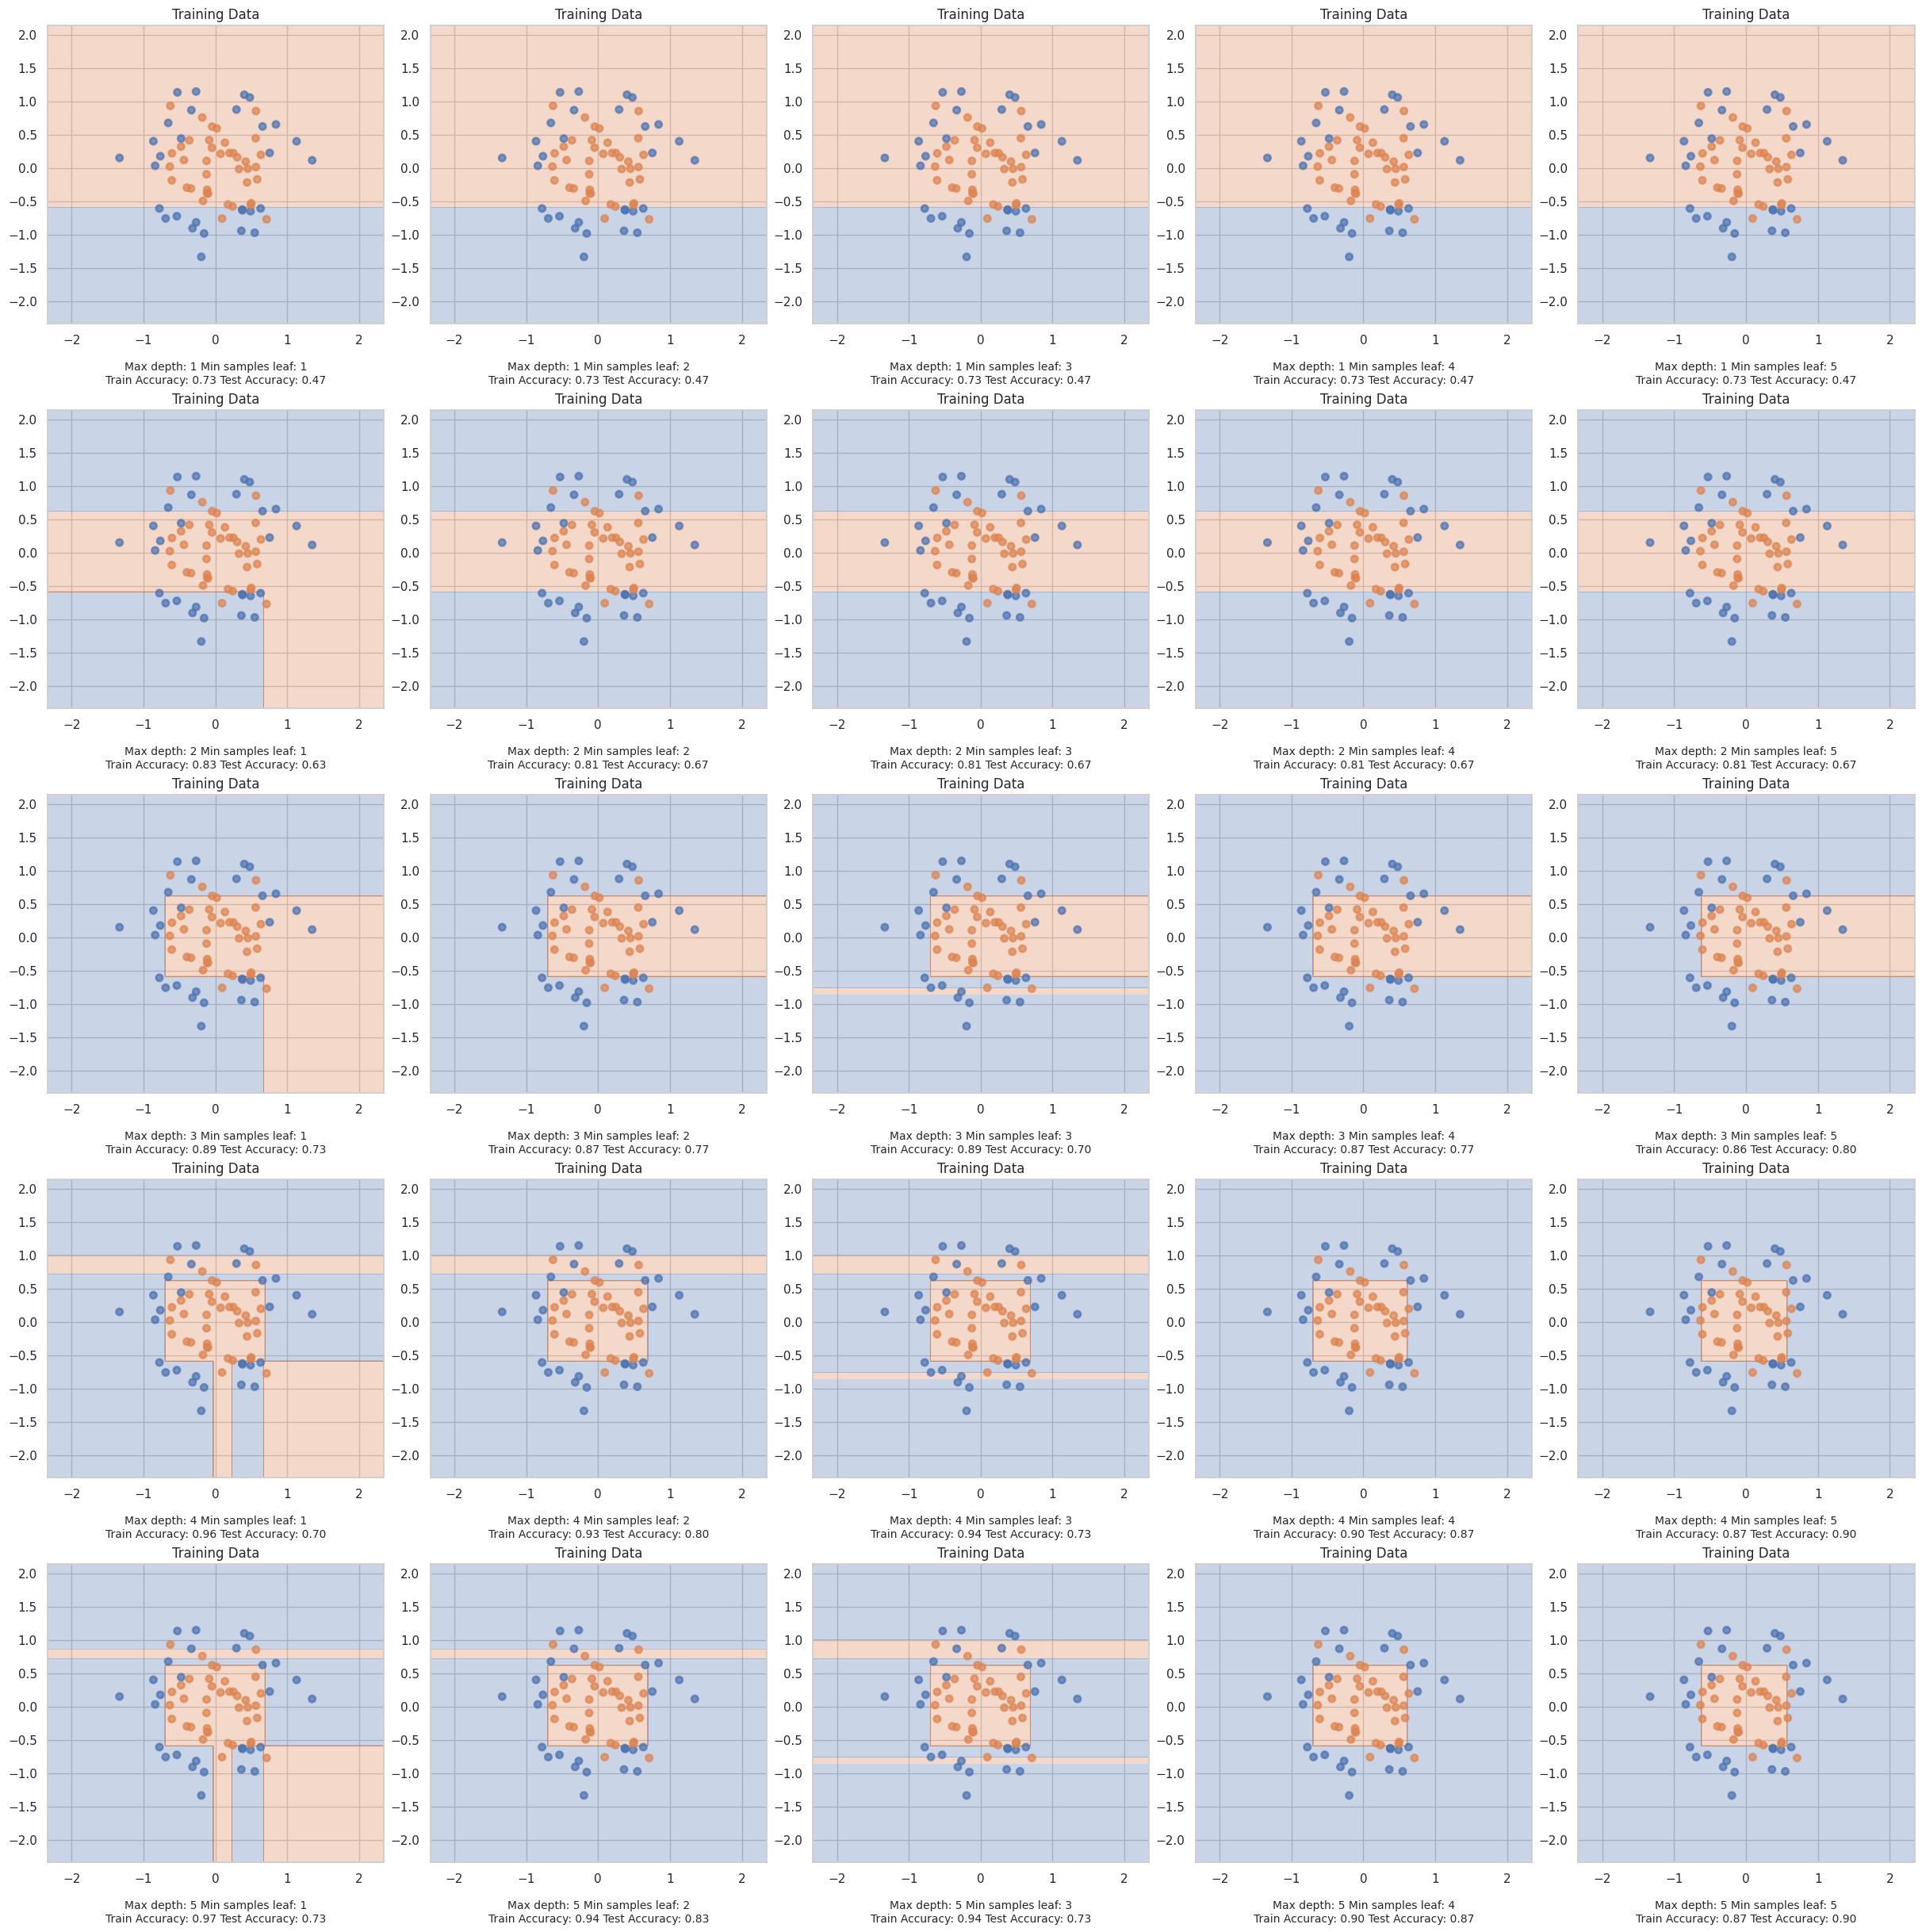

Best max_depth: 5
Best min samples leaf: 5


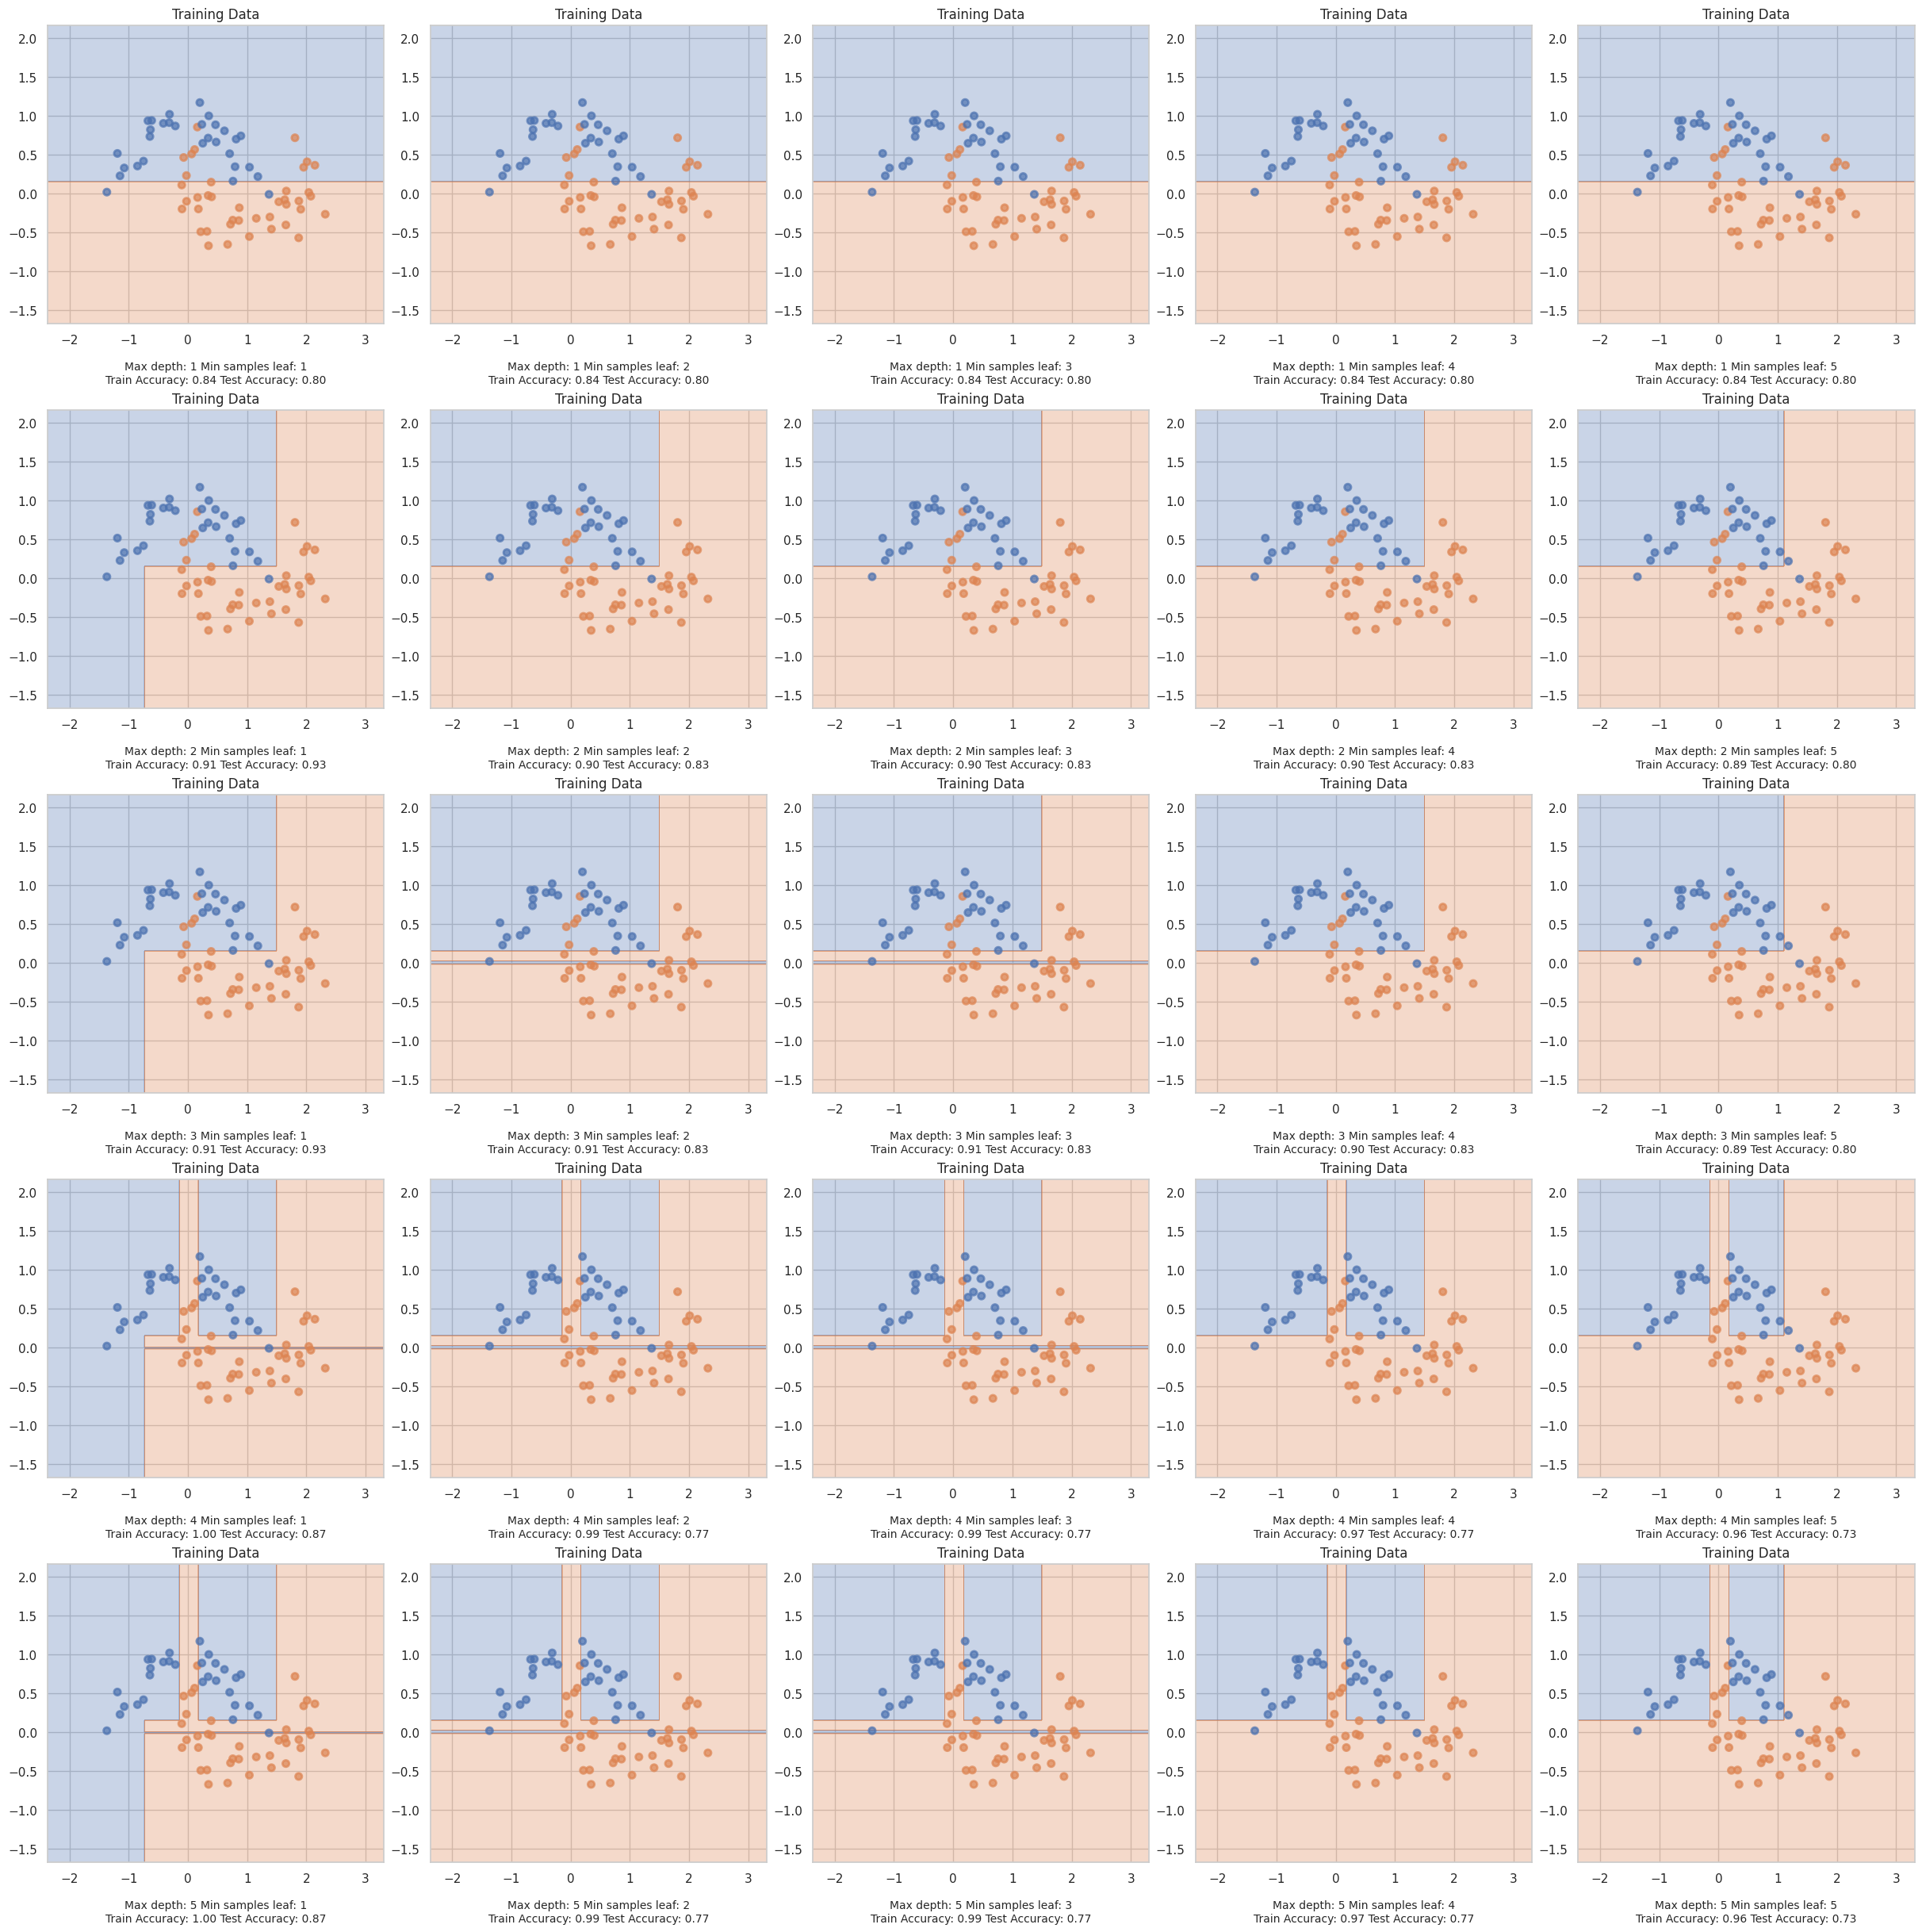

Best max_depth: 5
Best min samples leaf: 5


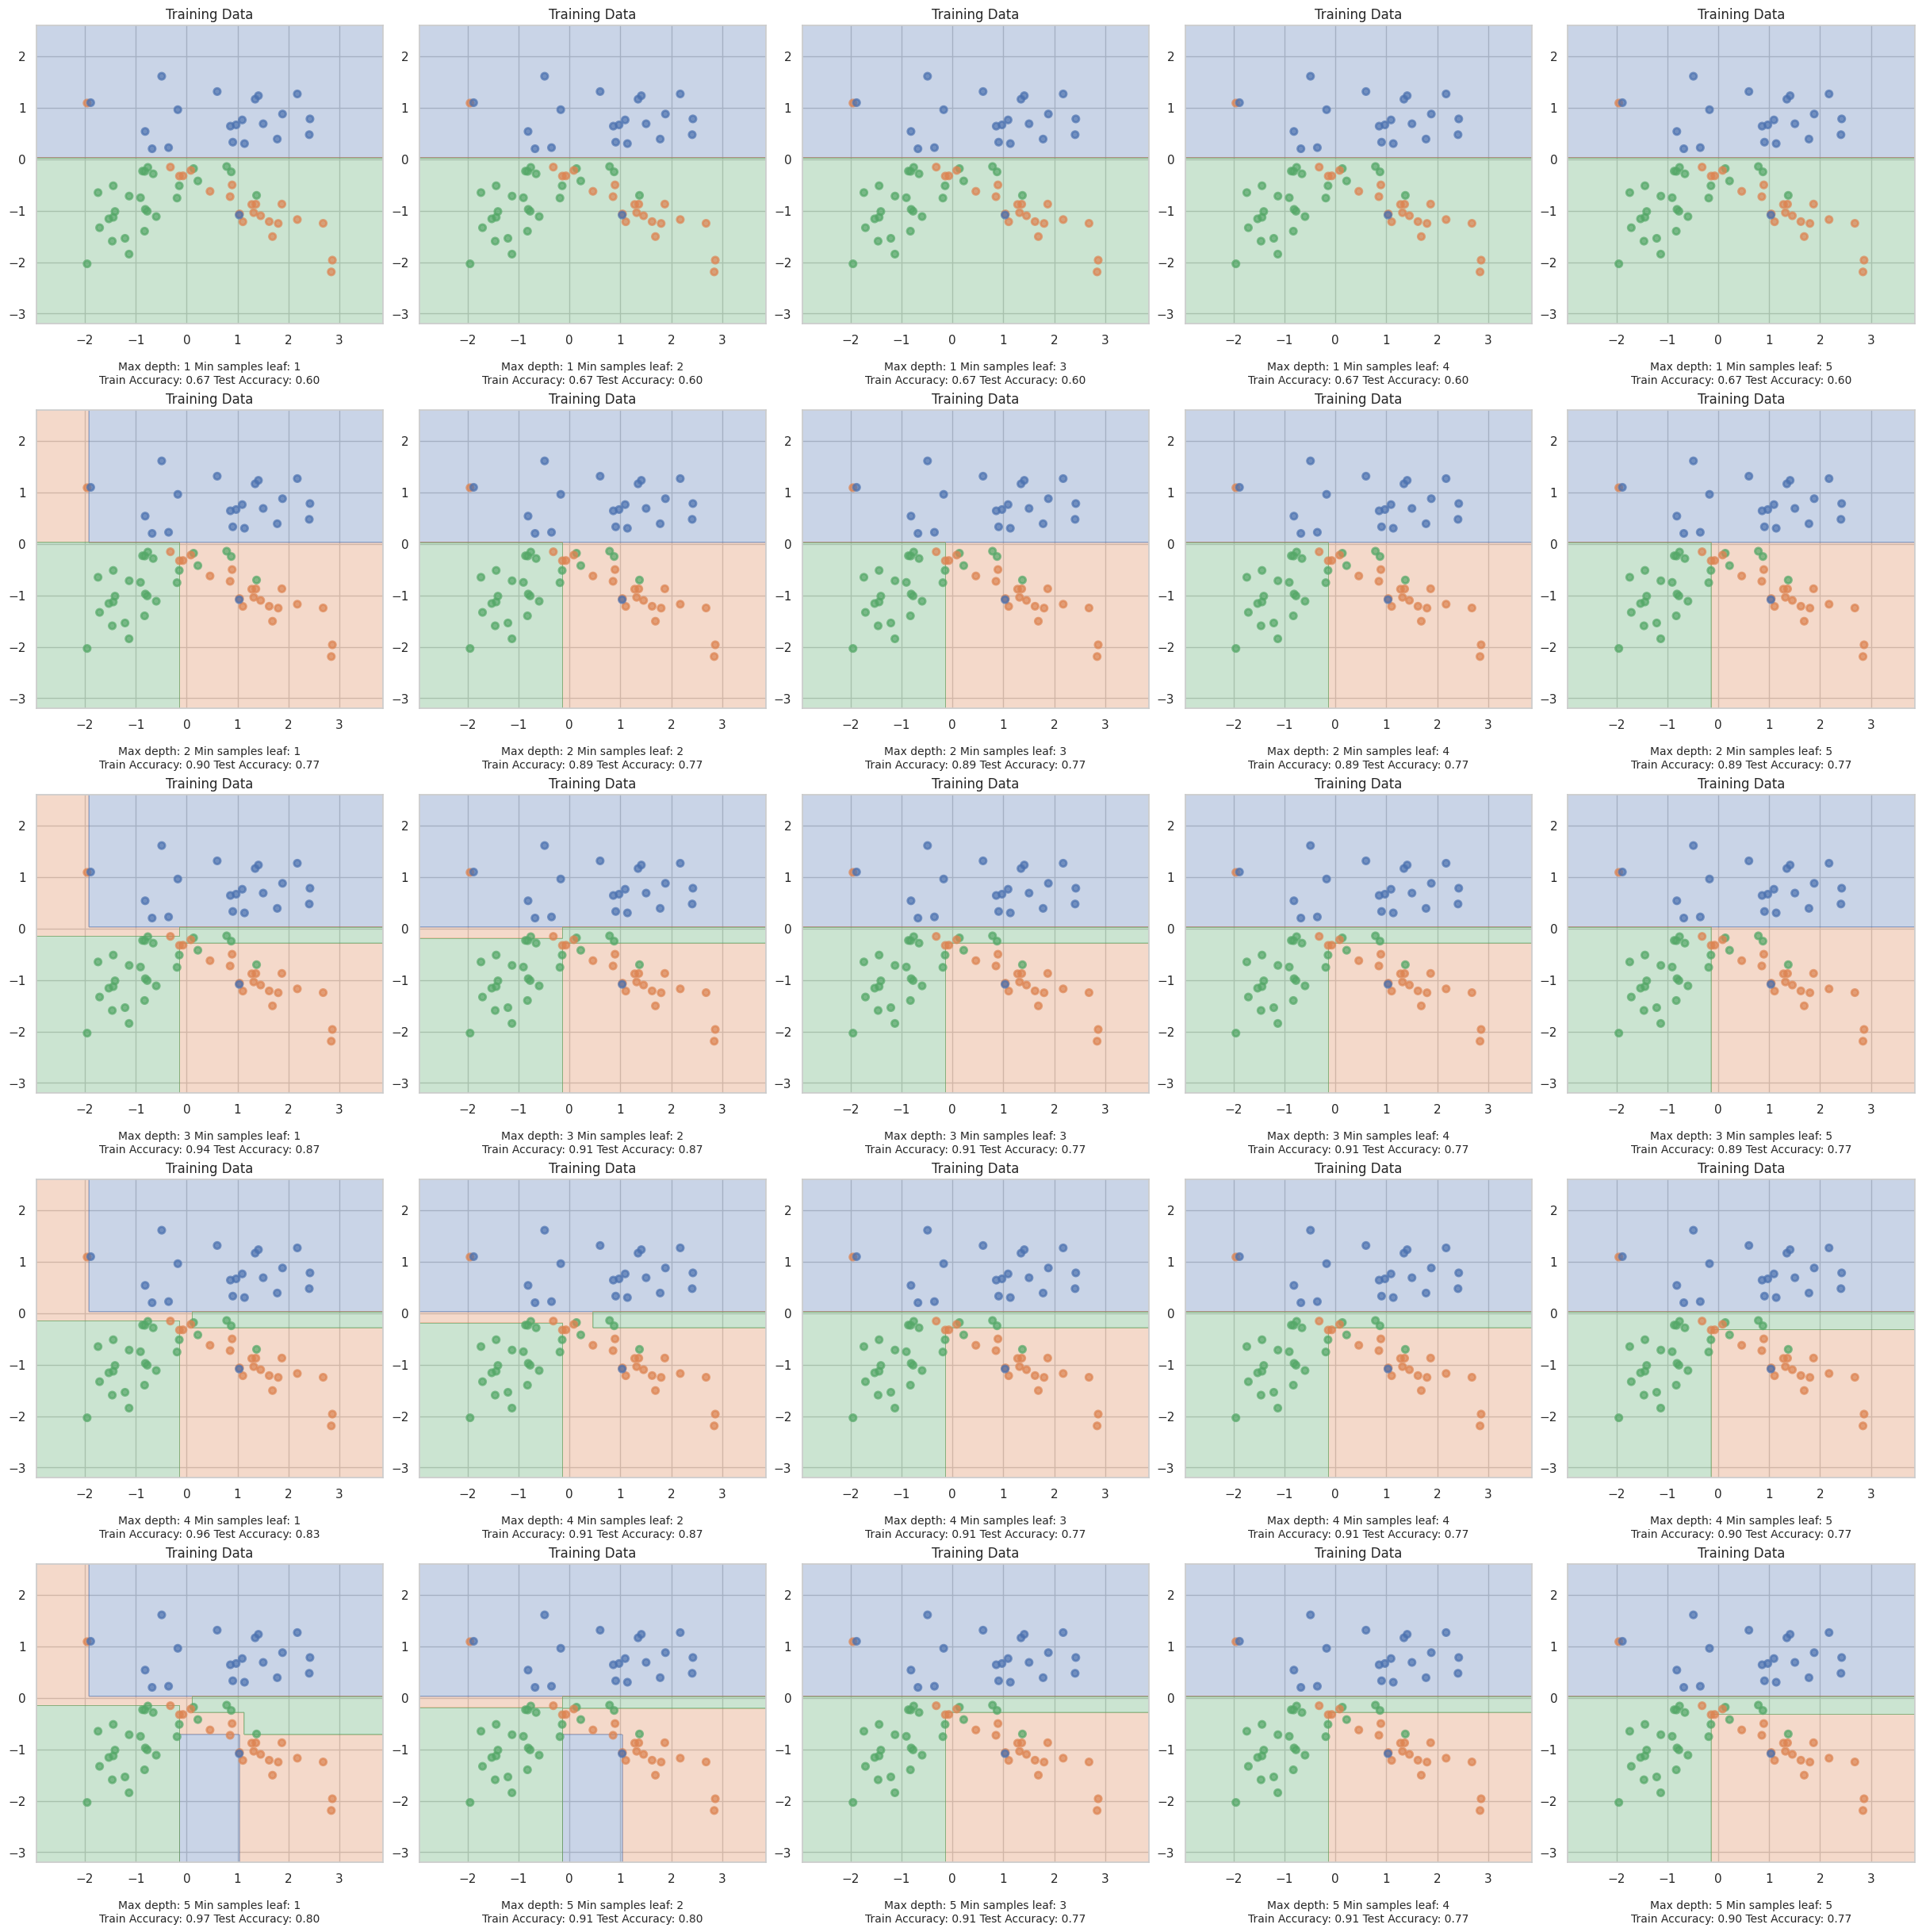

Best max_depth: 5
Best min samples leaf: 5


In [58]:
for dataset in datasets:
    max_depth, min_samples_leaf = get_best_param(dataset)
    print(f"Best max_depth: {max_depth}\nBest min samples leaf: {min_samples_leaf}")

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

**Login**: nnnekrasovEdu


**Посылка**: https://contest.yandex.ru/contest/56884/run-report/102656823/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [257]:
import pandas as pd
from hw5code import find_best_split

df = pd.read_csv('students.csv')
df.sample()

,STG,SCG,STR,LPR,PEG,UNS
42,0.14,0.49,0.55,0.29,0.6,1


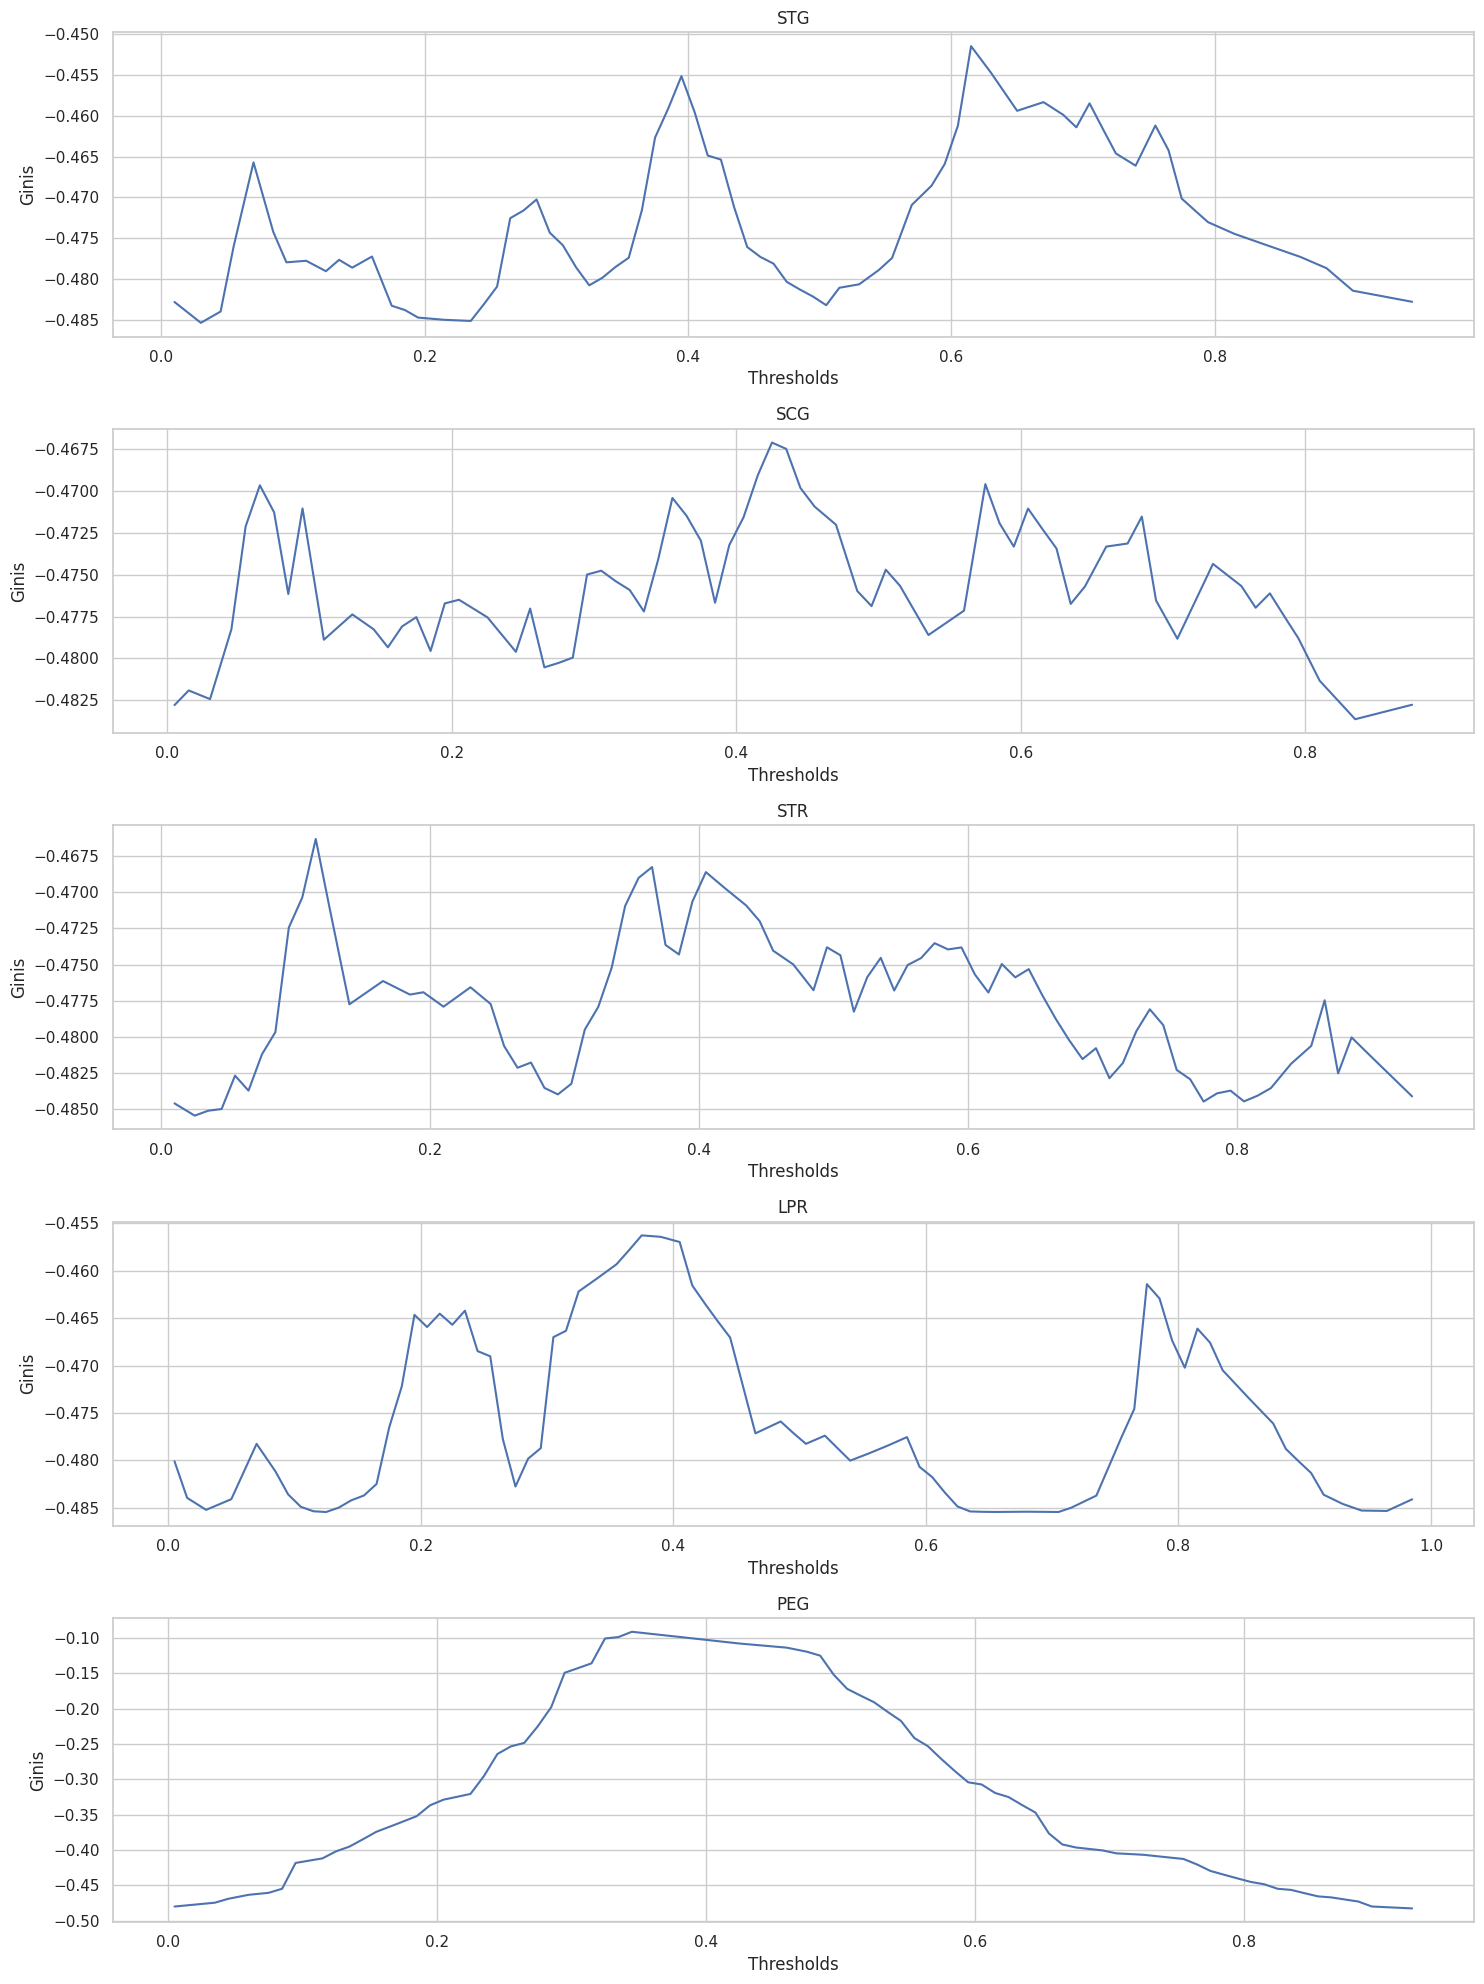

In [262]:
fig, axes = plt.subplots(len(df.columns) - 1, 1, figsize=(15, 20))

target_col = "UNS"

for i, column in enumerate(df.columns, 1):
    if column == target_col:
        break
    thresholds, ginis, _, _ = find_best_split(df[column], df[target_col])
    sns.lineplot(x=thresholds, y=ginis, ax=axes[i-1])
    axes[i-1].set_title(column)
    axes[i-1].set(xlabel="Thresholds", ylabel="Ginis")

plt.tight_layout()
plt.show()
   

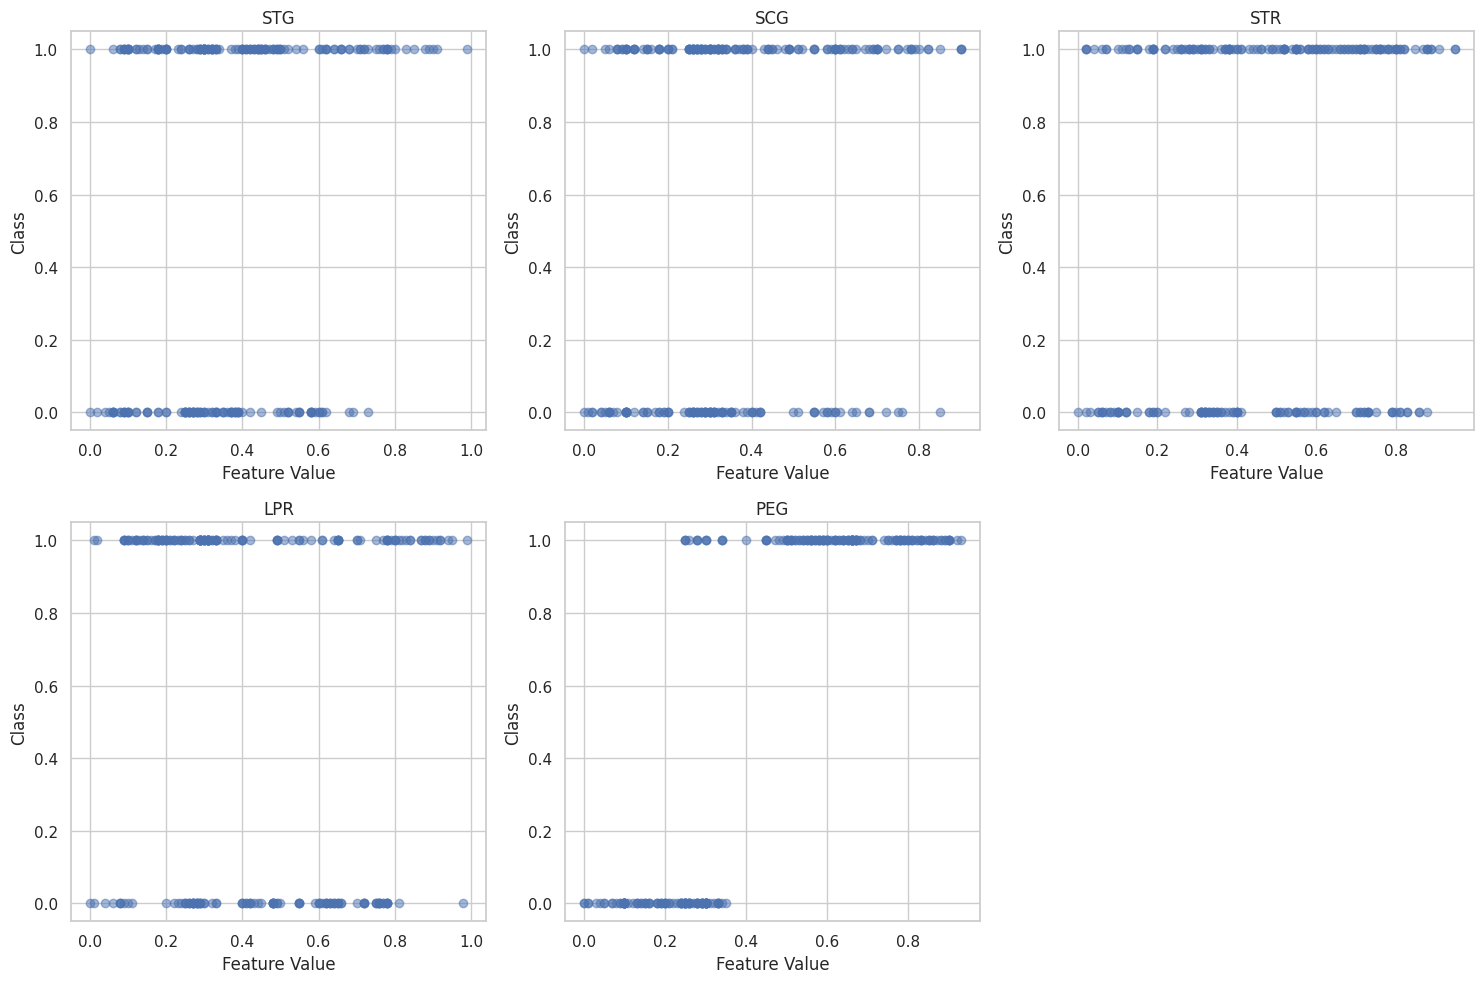

In [265]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(df.columns, start=1):
    if feature == target_col:
        break
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df[target_col], alpha=0.5)
    plt.title(f"{feature}")
    plt.xlabel("Feature Value")
    plt.ylabel("Class")

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Судя по значениям критерия Джини, лучше всего производить деление по признаку **PEG**, поскольку значения Джини у него минимально. По scatter графику это хорошо видно, т.к. можно рассмотреть почти идеальное разделяющее значение. Для "хороших" признаков кривая значений критерия Джини будет иметь ярко выраженный минимум, что соответствует лучшему разделению выборки. Отличие от других кривых в том, что они не имеют ярко выраженного минимума, а кривая словно скачет вверх и вниз. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Посылка**: https://contest.yandex.ru/contest/56884/run-report/102769895/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
df = pd.read_csv('agaricus-lepiota.data')
df.sample()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
3267,p,x,s,g,f,c,f,c,n,u,...,s,w,w,p,w,o,p,n,v,d


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from hw5code import DecisionTree


label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.iloc[:, 1:].to_numpy(), df.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTree(['categorical'] * df.shape[1])
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


__Задание 9. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [6]:
df = pd.read_csv('tic-tac-toe-endgame.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

def Check(X_train, y_train, X_test, y_test, data, key):
    scores = []

    for v in data:
        cls = DecisionTree(['categorical'] * X_train.shape[1], **{key: v})
        cls.fit(X_train, y_train)
        y_pred = cls.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    
    return scores

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

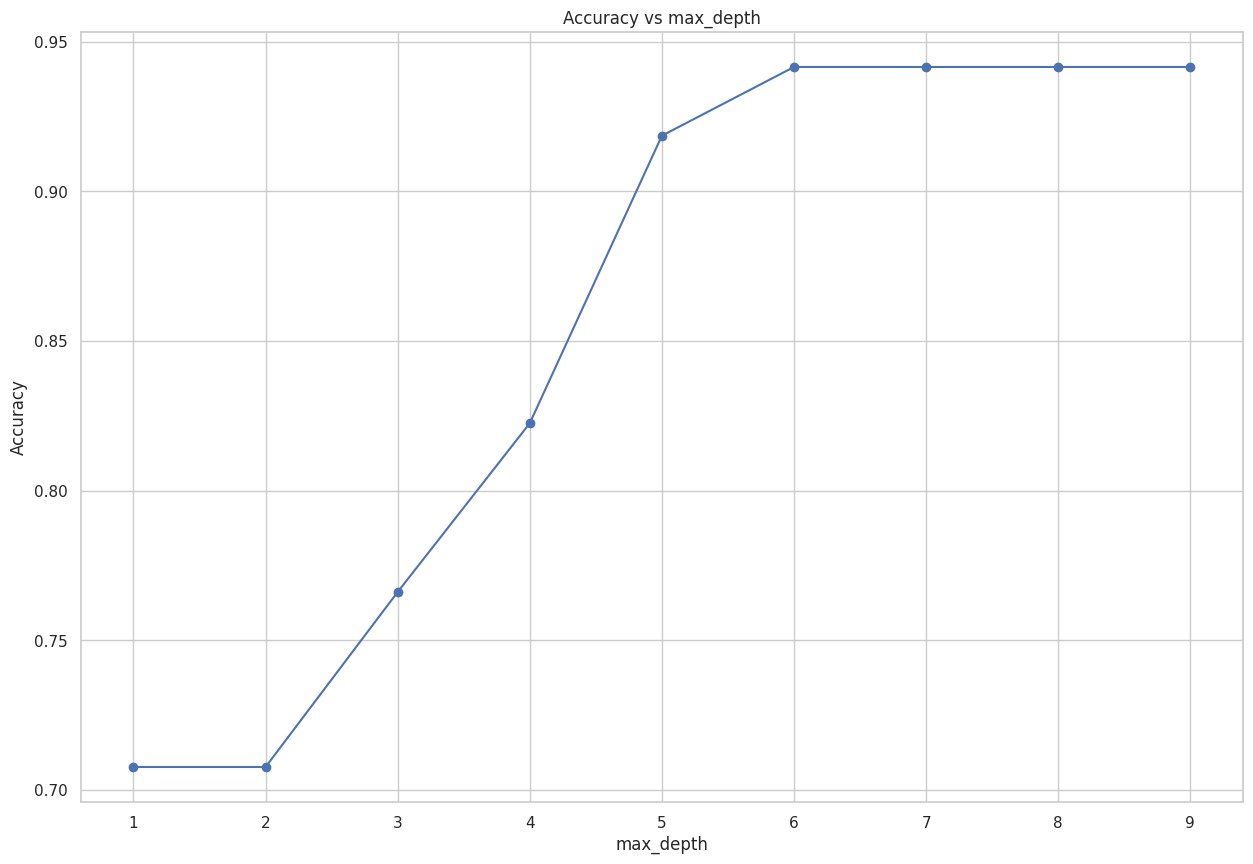

In [8]:
scores_depth = Check(X_train, y_train, X_test, y_test, np.arange(1, 10), 'max_depth')
plt.figure(figsize=(15, 10))
plt.plot(np.arange(1, 10), scores_depth, marker='o')
plt.title('Accuracy vs max_depth') 
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

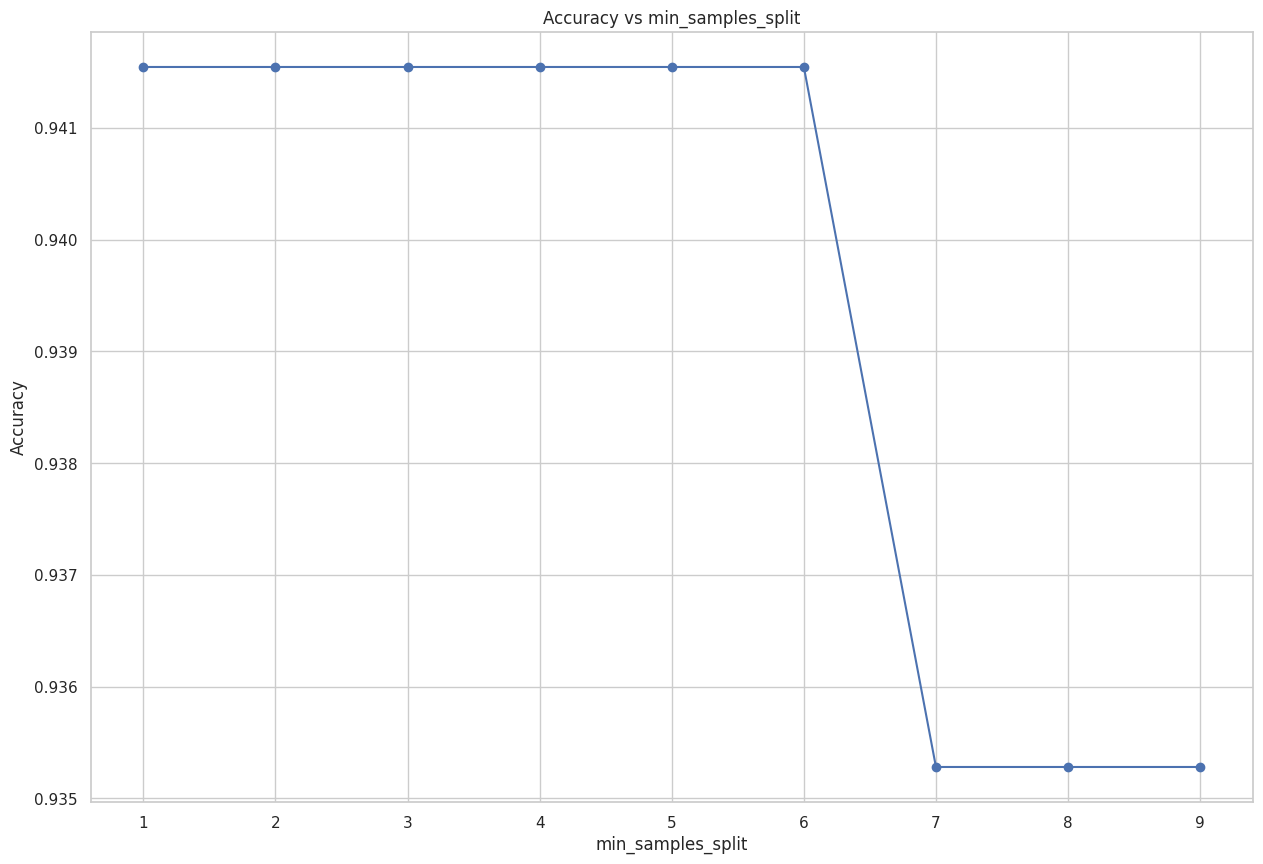

In [9]:
scores_depth = Check(X_train, y_train, X_test, y_test, np.arange(1, 10), 'min_samples_split')
plt.figure(figsize=(15, 10))
plt.plot(np.arange(1, 10), scores_depth, marker='o')
plt.title('Accuracy vs min_samples_split') 
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


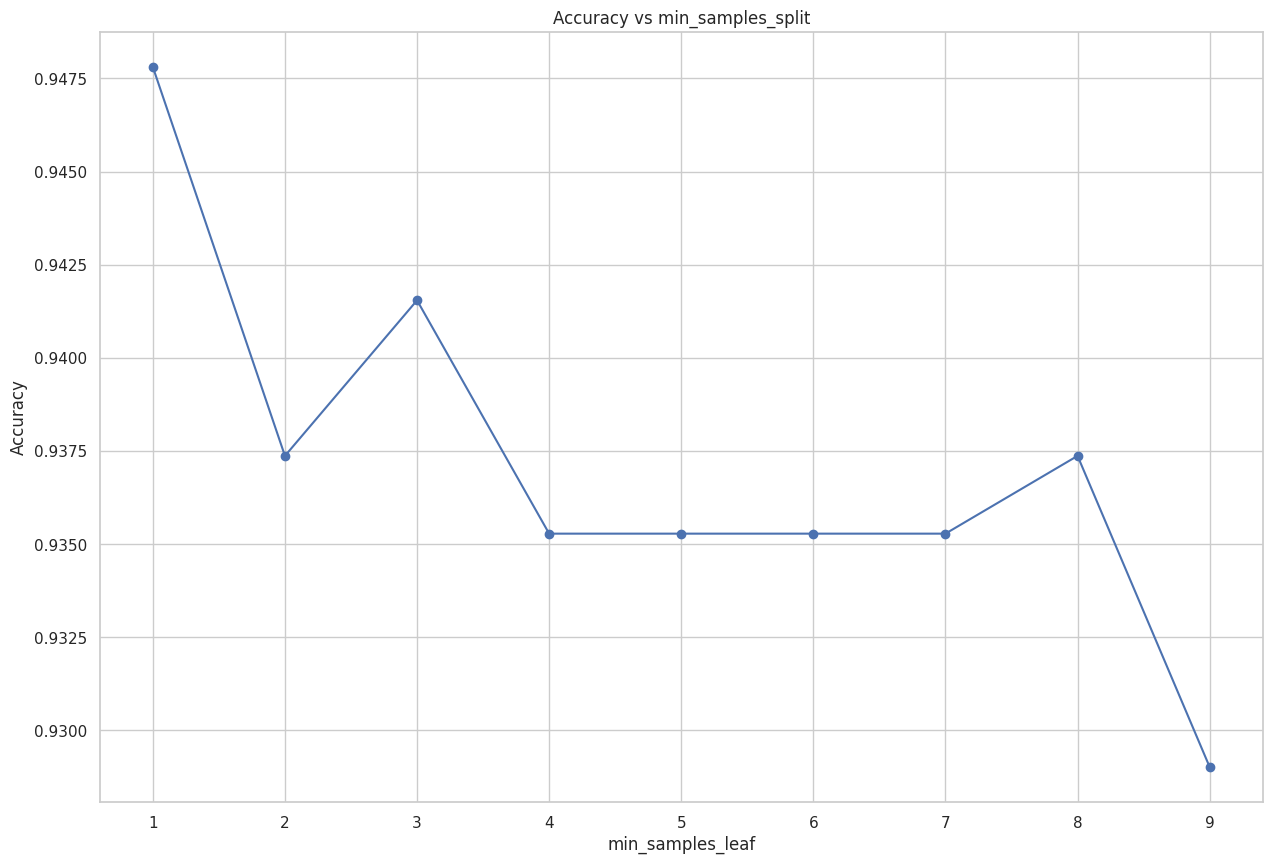

In [10]:
scores_depth = Check(X_train, y_train, X_test, y_test, np.arange(1, 10), 'min_samples_leaf')
plt.figure(figsize=(15, 10))
plt.plot(np.arange(1, 10), scores_depth, marker='o')
plt.title('Accuracy vs min_samples_split') 
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [40]:
def get_data(path):
    df = pd.read_csv(path)
    label_encoder = LabelEncoder()
    for column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])
    if path == 'tic-tac-toe-endgame.csv':
        return df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()
    elif path == 'agaricus-lepiota.data':
        return df.iloc[:,1:].to_numpy(), df.iloc[:,0].to_numpy()
    elif path == 'car.data':
        return df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()
    elif path == 'nursery.data':
        return df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()

paths = ['agaricus-lepiota.data', 'tic-tac-toe-endgame.csv', 'car.data', 'nursery.data']
paths = ['agaricus-lepiota.data']
datasets = [(path, get_data(path)) for path in paths]


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score



onehot_encoder = OneHotEncoder(sparse=False)

results = []

for name, data in datasets:
    data, target = data

    dt_real = DecisionTree(['real'] * data.shape[1])
    dt_real_scores = cross_val_score(dt_real, data_encoded_label, target, cv=10, scoring=make_scorer(accuracy_score))
    
    dt_categorical = DecisionTree(['categorical'] * data.shape[1])
    dt_categorical_scores = cross_val_score(dt_categorical, data_encoded_label, target, cv=10, scoring=make_scorer(accuracy_score), error_score='raise')
    
    data_encoded_onehot = pd.get_dummies(data)
    dt_real_onehot = DecisionTree(['real'] * data.shape[1])
    dt_real_onehot_scores = cross_val_score(dt_real_onehot, data_encoded_onehot, target, cv=10, scoring=make_scorer(accuracy_score))
    
    dt_sklearn = DecisionTreeClassifier()
    dt_sklearn_scores = cross_val_score(dt_sklearn, data, target, cv=10, scoring=make_scorer(accuracy_score))
    
    results.append({
        'Dataset': name,
        'DecisionTree (Real)': dt_real_scores.mean(),
        'DecisionTree (Categorical)': dt_categorical_scores.mean(),
        'DecisionTree (Real + OneHot)': dt_real_onehot_scores.mean(),
        'DecisionTree (sklearn)': dt_sklearn_scores.mean(),
    })

df_results = pd.DataFrame(results)
print(df_results)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nik/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 158, in pandas._libs.index.IndexEngine.get_loc
TypeError: '(slice(None, None, None), 0)' is an invalid key

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/nik/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nik/ml-course-hse/2023-fall/homeworks-practice/homework-practice-05-trees/hw5code.py", line 168, in fit
    self._fit_node(X, y, self._tree)
  File "/home/nik/ml-course-hse/2023-fall/homeworks-practice/homework-practice-05-trees/hw5code.py", line 101, in _fit_node
    feature_vector = sub_X[:, feature]
  File "/home/nik/.local/lib/python3.10/site-packages/pandas/core/frame.py", line 3896, in __getitem__
    indexer = self.columns.get_loc(key)
  File "/home/nik/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    self._check_indexing_error(key)
  File "/home/nik/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 5974, in _check_indexing_error
    raise InvalidIndexError(key)
pandas.errors.InvalidIndexError: (slice(None, None, None), 0)


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: